# Assignment 6 

**Objective** : This assignment focuses on understanding and comparing the performance of different machine learning models for predicting cancer types based on a given dataset. You will analyse Support Vector Machines (SVM), Random forest (RF), neural network (NN) regression and other relevant techniques.



### Import Libraries
Importing necessary libraries for data handling, model building, and evaluation.

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

### Load the Dataset
Load the dataset and display basic info.

In [2]:

data = pd.read_csv("breast cancer.csv")  
print(data.head())
print(data.info())
print(data.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

### Data Preprocessing
Data cleaning, separating features and target variable, and data scaling.

In [3]:

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Malignant: 1, Benign: 0
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

#### Split the dataset into training and testing sets

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Standardize the features

In [5]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Training - Support Vector Machine (SVM)
Train the SVM model using different kernels to compare performance.

### Linear Kernel

In [6]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
print("SVM Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_svm_linear))


SVM Linear Kernel Accuracy: 0.956140350877193


### RBF Kernel

In [7]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
print("SVM RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))


SVM RBF Kernel Accuracy: 0.9824561403508771


### Model Training - Random Forest
Train the Random Forest classifier and evaluate its performance.

In [8]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9649122807017544


### Model Training - Neural Network
Train the neural network model and use Grid Search for parameter tuning.

In [9]:
nn = MLPClassifier(max_iter=1000, random_state=42)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search = GridSearchCV(nn, param_grid, n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train)
best_nn = grid_search.best_estimator_
y_pred_nn = best_nn.predict(X_test)
print("Neural Network Best Model Accuracy:", accuracy_score(y_test, y_pred_nn))


Neural Network Best Model Accuracy: 0.9649122807017544


#### Method to plot confusion matrix and classification report

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()
    
    
def classification_report_to_df(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    return report_df

def plot_classification_report(y_true, y_pred, title="Classification Report"):
    report_df = classification_report_to_df(y_true, y_pred)
    
    plt.figure(figsize=(10, 4))
    sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
    plt.title(title)
    plt.show()



## Model Evaluation and Comparison
Comparing SVM, Random Forest, and Neural Network based on accuracy, confusion matrix, and classification report.



### SVM Linear Kernel Results

SVM Linear Kernel Confusion Matrix:


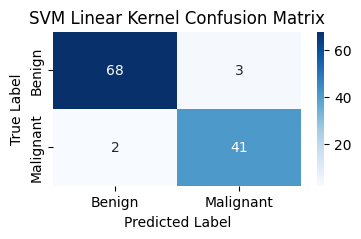

SVM Linear Kernel Classification Report:


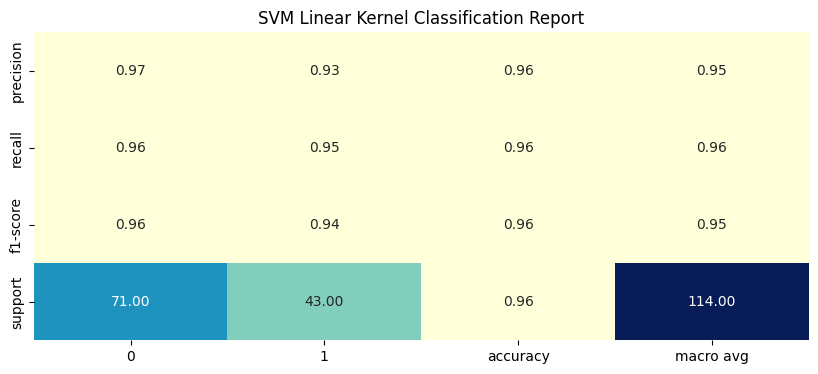

In [11]:

print("SVM Linear Kernel Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_svm_linear, "SVM Linear Kernel Confusion Matrix")
print("SVM Linear Kernel Classification Report:")
plot_classification_report(y_test, y_pred_svm_linear, title="SVM Linear Kernel Classification Report")



### Random Forest Results

Random Forest Confusion Matrix:


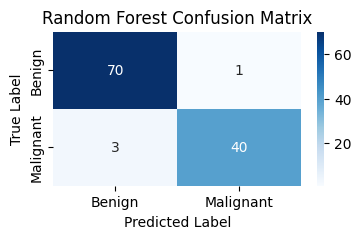

Random Forest Classification Report:


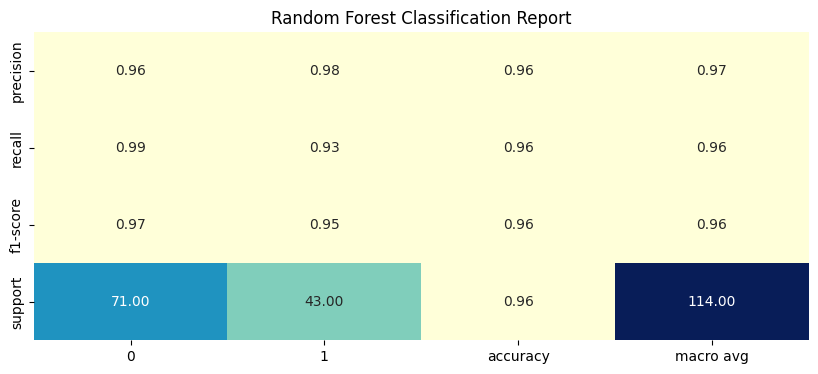

In [12]:

print("Random Forest Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
print("Random Forest Classification Report:")
plot_classification_report(y_test, y_pred_rf, title="Random Forest Classification Report")


### Neural Network Results

Neural Network Confusion Matrix:


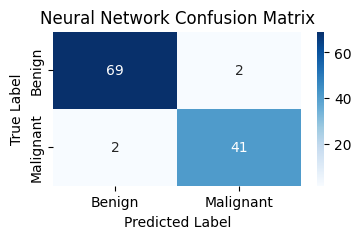

Neural Network Classification Report:


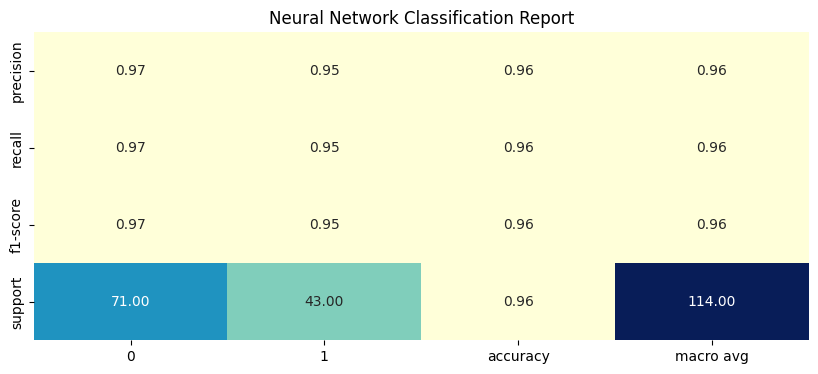

In [13]:

print("Neural Network Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network Confusion Matrix")
print("Neural Network Classification Report:")
plot_classification_report(y_test, y_pred_nn, title="Neural Network Classification Report")
